# Usecase: 
# Explore the data tips in seaborn and come with 5 good insight (It will cover your pandas, and visualization skills)

# Hint:
# Use Pandas : Filter, slice, aggregation, groupby
# matplotlib and Seaborn : Scatter plot, histogram, boxplot, density plot

# 1. 
Our First insight will be to try to find out if people are eating more during weekends and weekdays

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [113]:
tips_group = tips.groupby(['day'])
tips_group.agg([np.sum, np.mean, np.std]).round(2)

total_bill                  tip             size            
            sum   mean   std     sum  mean   std  sum  mean   std
day                                                              
Thur    1096.33  17.68  7.89  171.83  2.77  1.24  152  2.45  1.07
Fri      325.88  17.15  8.30   51.96  2.73  1.02   40  2.11  0.57
Sat     1778.40  20.44  9.48  260.40  2.99  1.63  219  2.52  0.82
Sun     1627.16  21.41  8.83  247.39  3.26  1.23  216  2.84  1.01

From the sum of the bills from each day we find that Saturday and Sundays have higher bill than Thursday and Friday. Notice the unusual trend that there is relatively low amount of bills on Friday. 

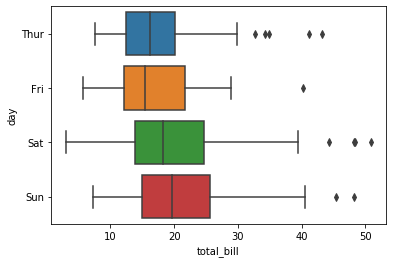

In [114]:
sns.boxplot(tips['total_bill'], tips['day'])

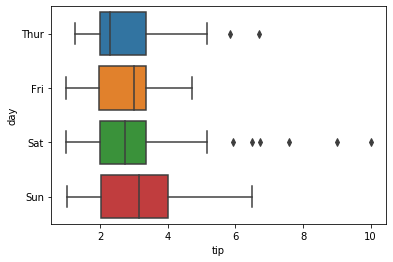

In [115]:
sns.boxplot(tips['tip'],tips['day'])

Its clear from bills and the tips from each days we find that people tend to eat more on weekends.
People are also leaving bigger tips on the weekends. 

# 2. 
Eating habit of smokers and non-smokers who comes to the retaurent

In [116]:
tips.groupby(['smoker']).count()

,total_bill,tip,sex,day,time,size
smoker,,,,,,
Yes,93,93,93,93,93,93
No,151,151,151,151,151,151


It seems that significantly less number of smokers come to the restaurant. 

In [117]:
tips_smoke = tips.groupby(['smoker'])
tips_smoke.agg([np.sum, np.mean, np.std]).round(2)

total_bill                  tip             size            
              sum   mean   std     sum  mean   std  sum  mean   std
smoker                                                             
Yes       1930.34  20.76  9.83  279.81  3.01  1.40  224  2.41  0.81
No        2897.43  19.19  8.26  451.77  2.99  1.38  403  2.67  1.02

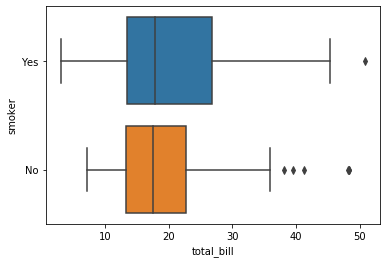

In [118]:
sns.boxplot(tips['total_bill'], tips['smoker'])

As a result of lower number of smokers coming to the restaurent the total bill is obviously less
than the same for the non-smokers. However it seems that some of them are probably paying more than
the non-smokers. This will be clear from a density plot.  

Text(0.5, 1.0, 'distribution of bills of smokers')

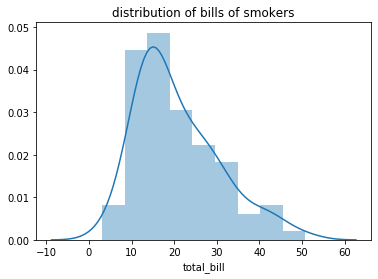

In [119]:
cond_smoke = (tips['smoker'] == 'Yes')
tips_smoke_new = tips[cond_smoke]
sns.distplot(tips_smoke_new['total_bill'])
plt.xlabel
plt.title('distribution of bills of smokers')

Text(0.5, 1.0, 'distribution of bills of non-smokers')

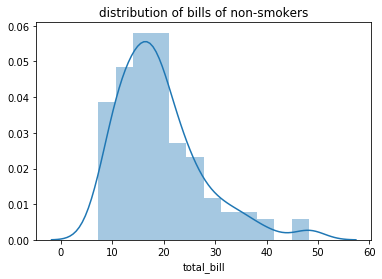

In [120]:
cond_smoke = (tips['smoker'] == 'No')
tips_smoke_new = tips[cond_smoke]
sns.distplot(tips_smoke_new['total_bill'])
plt.xlabel
plt.title('distribution of bills of non-smokers')

From the above plots it seems that the probability for a smoker to eat a quantity of the food for 
which the total bill comes between 20 and 30, is greater than than for a non smoker. This implies
that if the restaurant is made more smoker friendly (eg. seperate smoking room) then it can make more
profit. 

# 3. 
Dinner time vs lunch time 

In [121]:
tips_new = tips.groupby(['day', 'time'])
tips_new['total_bill'].count()

day   time  
Thur  Lunch     61
      Dinner     1
Fri   Lunch      7
      Dinner    12
Sat   Dinner    87
Sun   Dinner    76
Name: total_bill, dtype: int64

In [122]:
tips_new = tips.groupby(['day', 'time'])
tips_new.agg([np.sum, np.mean, np.std]).round(2)

total_bill                  tip               size            
                   sum   mean   std     sum  mean   std    sum  mean   std
day  time                                                                 
Thur Lunch     1077.55  17.66  7.95  168.83  2.77  1.25  150.0  2.46  1.07
     Dinner      18.78  18.78   NaN    3.00  3.00   NaN    2.0  2.00   NaN
Fri  Lunch       89.92  12.85  2.84   16.68  2.38  0.66   14.0  2.00  0.58
     Dinner     235.96  19.66  9.47   35.28  2.94  1.16   26.0  2.17  0.58
Sat  Lunch         NaN    NaN   NaN     NaN   NaN   NaN    NaN   NaN   NaN
     Dinner    1778.40  20.44  9.48  260.40  2.99  1.63  219.0  2.52  0.82
Sun  Lunch         NaN    NaN   NaN     NaN   NaN   NaN    NaN   NaN   NaN
     Dinner    1627.16  21.41  8.83  247.39  3.26  1.23  216.0  2.84  1.01

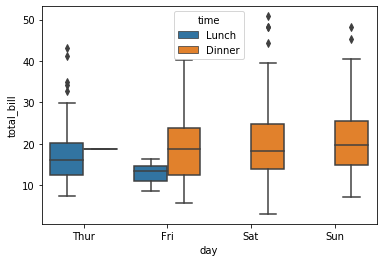

In [123]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips)

It seems that on weekends the restaurent do not open in the lunch hour. However they are open on weekdays. However on those days the lunch hour is not making as much money as in the dinner hours in weekends. Dry business 
dinner hours on weekdays is usually expected as we can also see above but I guess the restaurent needs to revise their lunch hour activities (eg. menu, customer survice etc.) for more profit during weekdays. 

# 4.
The trend of females and males who are coming to the restaurant. 

In [124]:
tips_new = tips.groupby(['day', 'time', 'sex'])
tips_new['total_bill'].count()

day   time    sex   
Thur  Lunch   Male      30
              Female    31
      Dinner  Female     1
Fri   Lunch   Male       3
              Female     4
      Dinner  Male       7
              Female     5
Sat   Dinner  Male      59
              Female    28
Sun   Dinner  Male      58
              Female    18
Name: total_bill, dtype: int64

First of all it is clear that the female persons are not coming to the restaurent as much as the Male. This severe in dinner time on weekends. 

157

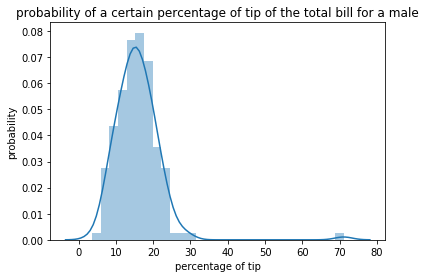

In [125]:
cond_tip_male = (tips['sex'] == 'Male')
tips_new = tips[cond_tip_male]
sns.distplot((tips_new['tip']/tips_new['total_bill'])*100)
plt.xlabel('percentage of tip')
plt.ylabel('probability')
plt.title('probability of a certain percentage of tip of the total bill for a male')
tips_new['tip'].count()

Text(0.5, 1.0, 'probability of a certain percentage of tip of the total bill for a female')

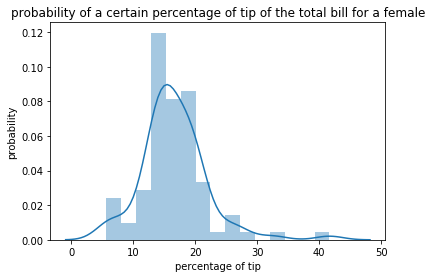

In [126]:
cond_tip_male = (tips['sex'] == 'Female')
tips_new = tips[cond_tip_male]
sns.distplot((tips_new['tip']/tips_new['total_bill'])*100)
plt.xlabel('percentage of tip')
plt.ylabel('probability')
plt.title('probability of a certain percentage of tip of the total bill for a female')

It seems that most male pay around 15% tip as we can observe a symmetric sharp distribution of the tip around 15%. However there is a higher chance that a female person will pay more or less than 15% compared to that of the males. 

# 5. 
tips at time different days, lunch and different hours 

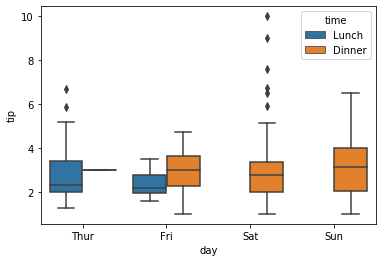

In [127]:
sns.boxplot(x="day", y="tip", hue="time", data=tips)

In [128]:
tips_new = tips.groupby(['day', 'time'])
tips_new.agg([np.sum, np.mean, np.std]).round(2)

total_bill                  tip               size            
                   sum   mean   std     sum  mean   std    sum  mean   std
day  time                                                                 
Thur Lunch     1077.55  17.66  7.95  168.83  2.77  1.25  150.0  2.46  1.07
     Dinner      18.78  18.78   NaN    3.00  3.00   NaN    2.0  2.00   NaN
Fri  Lunch       89.92  12.85  2.84   16.68  2.38  0.66   14.0  2.00  0.58
     Dinner     235.96  19.66  9.47   35.28  2.94  1.16   26.0  2.17  0.58
Sat  Lunch         NaN    NaN   NaN     NaN   NaN   NaN    NaN   NaN   NaN
     Dinner    1778.40  20.44  9.48  260.40  2.99  1.63  219.0  2.52  0.82
Sun  Lunch         NaN    NaN   NaN     NaN   NaN   NaN    NaN   NaN   NaN
     Dinner    1627.16  21.41  8.83  247.39  3.26  1.23  216.0  2.84  1.01

The existence of large amount of outliers during the dinner service on Saturday suggest the better customer service compared to Sunday.